<a href="https://colab.research.google.com/github/Shan-Lee2k/Data-Matching/blob/main/Data_Matching_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install recordlinkage
!pip install strsimpy

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import recordlinkage as rl
from recordlinkage import preprocessing
from recordlinkage import index

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, matthews_corrcoef, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [ ]:
# Download data into Dataset folder
%mkdir Dataset
%cd Dataset
!wget -nc https://raw.githubusercontent.com/scify/JedAIToolkit/master/data/cleanCleanErDatasets/DBLP-ACM/ACM.csv
!wget -nc https://raw.githubusercontent.com/scify/JedAIToolkit/master/data/cleanCleanErDatasets/DBLP-ACM/DBLP2.csv
!wget -nc https://raw.githubusercontent.com/scify/JedAIToolkit/master/data/cleanCleanErDatasets/DBLP-ACM/DBLP-ACM_perfectMapping.csv

/content/Dataset/Dataset
--2024-05-10 09:47:38--  https://raw.githubusercontent.com/scify/JedAIToolkit/master/data/cleanCleanErDatasets/DBLP-ACM/ACM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368667 (360K) [text/plain]
Saving to: ‘ACM.csv’

ACM.csv             100%[===================>] 360.03K  --.-KB/s    in 0.006s  

2024-05-10 09:47:38 (56.1 MB/s) - ‘ACM.csv’ saved [368667/368667]

--2024-05-10 09:47:38--  https://raw.githubusercontent.com/scify/JedAIToolkit/master/data/cleanCleanErDatasets/DBLP-ACM/DBLP2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request se

In [ ]:
ACM_PATH = '/content/Dataset/ACM.csv'
DBLP2_PATH = "/content/Dataset/DBLP2.csv"
MAPPING_PATH = '/content/Dataset/DBLP-ACM_perfectMapping.csv'

# DISPLAY DATASET



In [ ]:
# Read dataset
ds1 = pd.read_csv(ACM_PATH)
ds2 = pd.read_csv(DBLP2_PATH,encoding='unicode_escape')
ds_match = pd.read_csv(MAPPING_PATH)

In [ ]:
# Preview ACM Dataset
ds1.head()

,id,title,authors,venue,year
0,304586,The WASA2 object-oriented workflow management ...,"Gottfried Vossen, Mathias Weske",International Conference on Management of Data,1999
1,304587,A user-centered interface for querying distrib...,"Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,1999
2,304589,"World Wide Database-integrating the Web, CORBA...","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,1999
3,304590,XML-based information mediation with MIX,"Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,1999
4,304582,The CCUBE constraint object-oriented database ...,"Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,1999


In [ ]:
# Preview DBLP2 Dataset
ds2.head()

,id,title,authors,venue,year
0,journals/sigmod/Mackay99,Semantic Integration of Environmental Models f...,D. Scott Mackay,SIGMOD Record,1999
1,conf/vldb/PoosalaI96,Estimation of Query-Result Distribution and it...,"Viswanath Poosala, Yannis E. Ioannidis",VLDB,1996
2,conf/vldb/PalpanasSCP02,Incremental Maintenance for Non-Distributive A...,"Themistoklis Palpanas, Richard Sidle, Hamid Pi...",VLDB,2002
3,conf/vldb/GardarinGT96,Cost-based Selection of Path Expression Proces...,"Zhao-Hui Tang, Georges Gardarin, Jean-Robert G...",VLDB,1996
4,conf/vldb/HoelS95,Benchmarking Spatial Join Operations with Spat...,"Erik G. Hoel, Hanan Samet",VLDB,1995


In [ ]:
print(f"Number of record in AMC dataset: {len(ds1)}")
print(f"Number of record in DBLP2 dataset: {len(ds2)}")
print(f"List of venue in ACM dataset:  {ds1['venue'].unique()}")
print(f"List of venue in DBLP2 dataset:  {ds1['venue'].unique()}")

Number of record in AMC dataset: 2294
Number of record in DBLP2 dataset: 2616
List of venue in ACM dataset:  ['International Conference on Management of Data' 'ACM SIGMOD Record '
 'ACM Transactions on Database Systems (TODS) '
 'The VLDB Journal &mdash; The International Journal on Very Large Data Bases '
 'Very Large Data Bases']
List of venue in DBLP2 dataset:  ['International Conference on Management of Data' 'ACM SIGMOD Record '
 'ACM Transactions on Database Systems (TODS) '
 'The VLDB Journal &mdash; The International Journal on Very Large Data Bases '
 'Very Large Data Bases']


In [ ]:
# Kiểm tra trong bộ dữ liệu có missing value không
ds1[ds1.isnull().values.any(axis=1)]

,id,title,authors,venue,year
884,671838,High-Performance and Scalability through Appli...,NaN,Very Large Data Bases,2000
1146,673478,MineSet(tm): A System for High-End Data Mining...,NaN,Very Large Data Bases,1996
2128,959075,Database principles,NaN,ACM SIGMOD Record,2003
2129,959077,Book reviews,NaN,ACM SIGMOD Record,2003
2130,959082,Reports,NaN,ACM SIGMOD Record,2003
2131,945726,Special topic section on peer to peer data man...,NaN,ACM SIGMOD Record,2003
2132,945738,Standards,NaN,ACM SIGMOD Record,2003
2133,945740,Book reviews,NaN,ACM SIGMOD Record,2003
2134,959063,Special section on sensor network technology a...,NaN,ACM SIGMOD Record,2003
2136,758376,Author Index,NaN,Very Large Data Bases,2000


In [ ]:
# Drop-id in ACM
drop_id = ds1[ds1.isnull().values.any(axis=1)]['id']
print(drop_id)

884     671838
1146    673478
2128    959075
2129    959077
2130    959082
2131    945726
2132    945738
2133    945740
2134    959063
2136    758376
2139    671674
2145    615225
2148    604281
2150    603868
Name: id, dtype: int64


Xóa hàng missing value và kiểm tra lại trong ds1

In [ ]:
ds1.dropna(inplace=True)
ds1[ds1.isnull().values.any(axis=1)]

,id,title,authors,venue,year


In [ ]:
ds2[ds2.isnull().values.any(axis=1)]

,id,title,authors,venue,year


In [ ]:
print(ds1.info())
print(ds2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2280 entries, 0 to 2293
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2280 non-null   int64 
 1   title    2280 non-null   object
 2   authors  2280 non-null   object
 3   venue    2280 non-null   object
 4   year     2280 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 106.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2616 non-null   object
 1   title    2616 non-null   object
 2   authors  2616 non-null   object
 3   venue    2616 non-null   object
 4   year     2616 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 102.3+ KB
None


In [ ]:
# Xóa các hàng có drop-id ACM trong ds_match
print(f"Before: {len(ds_match)} records")
ds_match = ds_match[~ds_match['idACM'].isin(drop_id)]
print(f"After: {len(ds_match)} records")

Before: 2224 records
After: 2219 records


# PREPROCESSING


In [ ]:
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string

In [ ]:
# Preprocessing data authors, title, venue

def preprocessing(df):
    # remove (content) in () and lower
    df['clean_title'] = df['title'].map(lambda x: re.sub('\(.*\)', ' ', x))
    df['clean_title'] = df['clean_title'].map(lambda x: re.sub(r'[^\w\s]', ' ', x))
    df['clean_title'] = df['clean_title'].map(lambda x: x.lower())

    df['clean_author'] = df['authors'].map(lambda x: re.sub('\(.*\)', ' ', x))
    df['clean_author'] = df['clean_author'].map(lambda x: re.sub(r'[^\w\s,.]', ' ', x))
    df['clean_author'] = df['clean_author'].map(lambda x: re.sub(r'[0-9]', ' ', x))
    df['clean_author'] = df['clean_author'].map(lambda x: x.lower())

    df['clean_venue'] = df['venue'].map(lambda x: re.sub('\(.*\)', ' ', x))
    df['clean_venue'] = df['clean_venue'].map(lambda x: re.sub(r'[^\w\s]', ' ', x))
    df['clean_venue'] = df['clean_venue'].map(lambda x: x.lower())
    # remove white space
    df['clean_title'] = df['clean_title'].map(lambda x: x.strip())
    df['clean_author'] = df['clean_author'].map(lambda x: x.strip())
    df['clean_venue'] = df['clean_venue'].map(lambda x: x.strip())
    # replace multiple white space with single white space
    df['clean_title'] = df['clean_title'].map(lambda x: re.sub("\s\s+" , " ", x))
    df['clean_author'] = df['clean_author'].map(lambda x: re.sub("\s\s+" , " ", x))
    df['clean_venue'] = df['clean_venue'].map(lambda x: re.sub("\s\s+" , " ", x))
    return df
ds1 = preprocessing(ds1)
ds2 = preprocessing(ds2)


**Kết quả trước và sau khi tiền xử lý dữ liệu bằng hàm preprocessing()**

In [ ]:
ds1[["title","clean_title"]].sample(5)

,title,clean_title
304,Query optimization in compressed database systems,query optimization in compressed database systems
605,On the academic interview circuit: an end-to-e...,on the academic interview circuit an end to en...
2169,Discovering Web Services: An Overview,discovering web services an overview
1530,QBI: query by icons,qbi query by icons
102,Video anywhere: a system for searching and man...,video anywhere a system for searching and mana...


In [ ]:
ds1[["authors","clean_author"]].sample(10)

,authors,clean_author
950,"John C. Shafer, Rakesh Agrawal","john c. shafer, rakesh agrawal"
1579,Akmal B. Chaudhri,akmal b. chaudhri
829,"Michael J. Carey, Donald D. Chamberlin, Sriniv...","michael j. carey, donald d. chamberlin, sriniv..."
1628,Hamid Pirahesh,hamid pirahesh
948,"Gustavo Alonso, Claus Hagen, Hans-J&#246;rg Sc...","gustavo alonso, claus hagen, hans j rg schek, ..."
2240,"Beng Chin Ooi, Yanfeng Shu, Kian-Lee Tan","beng chin ooi, yanfeng shu, kian lee tan"
1440,"Joseph M. Hellerstein, Jeffrey F. Naughton, Av...","joseph m. hellerstein, jeffrey f. naughton, av..."
1779,"Stefan Berchtold, Christian B&#246;hm, Hans-Pe...","stefan berchtold, christian b hm, hans peter k..."
481,"Angela Bonifati, Stefano Ceri","angela bonifati, stefano ceri"
1411,"Helena Galhardas, Daniela Florescu, Dennis Sha...","helena galhardas, daniela florescu, dennis sha..."


In [ ]:
ds1[["venue","clean_venue"]].sample(25)

,venue,clean_venue
1798,International Conference on Management of Data,international conference on management of data
83,ACM Transactions on Database Systems (TODS),acm transactions on database systems
400,International Conference on Management of Data,international conference on management of data
2082,International Conference on Management of Data,international conference on management of data
1358,Very Large Data Bases,very large data bases
275,International Conference on Management of Data,international conference on management of data
1033,Very Large Data Bases,very large data bases
2120,ACM SIGMOD Record,acm sigmod record
46,International Conference on Management of Data,international conference on management of data
1192,The VLDB Journal &mdash; The International Jou...,the vldb journal mdash the international journ...


In [ ]:
ds2[["title","clean_title"]].head()

,title,clean_title
0,Semantic Integration of Environmental Models f...,semantic integration of environmental models f...
1,Estimation of Query-Result Distribution and it...,estimation of query result distribution and it...
2,Incremental Maintenance for Non-Distributive A...,incremental maintenance for non distributive a...
3,Cost-based Selection of Path Expression Proces...,cost based selection of path expression proces...
4,Benchmarking Spatial Join Operations with Spat...,benchmarking spatial join operations with spat...


In [ ]:
ds2[["authors","clean_author"]].sample(25)

,authors,clean_author
2534,"Mallela Subramanyam, Mitul Tiwari, Sandeep Sri...","mallela subramanyam, mitul tiwari, sandeep sri..."
1436,"Kimberly Keeton, Joseph M. Hellerstein, David ...","kimberly keeton, joseph m. hellerstein, david ..."
7,Praveen Seshadri,praveen seshadri
1593,"Mehul A. Shah, Wei Hong, Sirish Chandrasekaran...","mehul a. shah, wei hong, sirish chandrasekaran..."
732,"Günter Sauter, Fernando de Ferreira Rezende","günter sauter, fernando de ferreira rezende"
607,Sherif Danish,sherif danish
1825,Won Kim,won kim
673,"Jeannie Shands, Kenneth Salem, Hector Garcia-M...","jeannie shands, kenneth salem, hector garcia m..."
968,"James R. Hamilton, Limsoon Wong, Kenneth A. Ro...","james r. hamilton, limsoon wong, kenneth a. ro..."
300,"C. Mohan, Inderpal Narang","c. mohan, inderpal narang"


In [ ]:
ds2[["venue","clean_venue"]].head(10)

,venue,clean_venue
0,SIGMOD Record,sigmod record
1,VLDB,vldb
2,VLDB,vldb
3,VLDB,vldb
4,VLDB,vldb
5,SIGMOD Conference,sigmod conference
6,SIGMOD Record,sigmod record
7,VLDB J.,vldb j
8,SIGMOD Record,sigmod record
9,SIGMOD Record,sigmod record


In [ ]:
ds1["clean_venue"].unique()

array(['international conference on management of data',
       'acm sigmod record', 'acm transactions on database systems',
       'the vldb journal mdash the international journal on very large data bases',
       'very large data bases'], dtype=object)

In [ ]:
ds2["clean_venue"].unique()

array(['sigmod record', 'vldb', 'sigmod conference', 'vldb j',
       'acm trans database syst'], dtype=object)

**Sau khi tìm hiểu về tên của venue, ta thấy giá trị của venue giữa 2 dataset là tương đồng nhau nên ta sẽ thiết lập 1 bảng chung để nhất quán dữ liệu giữa chúng **

In [ ]:
venue_mapping_dict ={
    'international conference on management of data': 'sigmod conference',
    'acm sigmod record': 'sigmod record',
    'very large data bases': 'vldb',
    'the vldb journal mdash the international journal on very large data bases': 'vldb j',
    'acm transactions on database systems' : 'acm trans database syst'
}

In [ ]:
# Thay đổi giá trị clean_venue tương ứng trong bảng ACM
ds1['clean_venue'] = ds1['clean_venue'].map(venue_mapping_dict)

In [ ]:
ds1["clean_venue"].sample(10)

843                        vldb
1130                       vldb
627                      vldb j
459               sigmod record
1494          sigmod conference
727           sigmod conference
1909              sigmod record
331     acm trans database syst
1653          sigmod conference
1335                       vldb
Name: clean_venue, dtype: object

# **Indexing**
Liên kết 2 bảng dữ liệu bằng phương pháp Indexing, key = "year" để giảm thiểu cặp dữ liệu match giữa 2 bảng

In [ ]:
ds1=ds1.set_index('id')
ds2=ds2.set_index('id')
ds1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2280 entries, 304586 to 672979
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2280 non-null   object
 1   authors       2280 non-null   object
 2   venue         2280 non-null   object
 3   year          2280 non-null   int64 
 4   clean_title   2280 non-null   object
 5   clean_author  2280 non-null   object
 6   clean_venue   2280 non-null   object
dtypes: int64(1), object(6)
memory usage: 142.5+ KB


In [ ]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2616 entries, journals/sigmod/Mackay99 to conf/vldb/LiM01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2616 non-null   object
 1   authors       2616 non-null   object
 2   venue         2616 non-null   object
 3   year          2616 non-null   int64 
 4   clean_title   2616 non-null   object
 5   clean_author  2616 non-null   object
 6   clean_venue   2616 non-null   object
dtypes: int64(1), object(6)
memory usage: 163.5+ KB


In [ ]:
indexer = rl.Index()
indexer.block(['year','clean_venue'],['year','clean_venue'])
#indexer.block('clean_venue','clean_venue')
#indexer.block('year','year')
link_2_record = indexer.index(ds2,ds1)
print(f"Number of year,clean_venue match pairs: {len(link_2_record)}")
print(f"Type of pairs: {type(link_2_record)}")

Number of year,clean_venue match pairs: 156745
Type of pairs: <class 'pandas.core.indexes.multi.MultiIndex'>


In [ ]:
link_2_record[:5]


MultiIndex([('journals/sigmod/Mackay99', 333609),
            ('journals/sigmod/Mackay99', 333608),
            ('journals/sigmod/Mackay99', 333611),
            ('journals/sigmod/Mackay99', 333610),
            ('journals/sigmod/Mackay99', 333613)],
           names=['id_1', 'id_2'])

# Spliting Traning Set, Test Set

In [ ]:
# Match pairs from ds_match and unmatch_pair = link_2_record - match_pairs
match_pairs = list(map(tuple,ds_match.values.tolist()))
print(f"Size of true match: {len(match_pairs)}")
match_pairs[:5]

Size of true match: 2219


[('conf/sigmod/SlivinskasJS01', 375678),
 ('conf/sigmod/ChaudhuriDN01', 375694),
 ('conf/sigmod/RinfretOO01', 375669),
 ('conf/sigmod/BreunigKKS01', 375672),
 ('conf/sigmod/JagadishJOT01', 375687)]

In [ ]:
unmatch_pairs = list(set(list(link_2_record)) - set(match_pairs))
unmatch_pairs[:5]

[('journals/sigmod/Wu02', 507356),
 ('conf/vldb/TsurAADKW01', 672198),
 ('conf/sigmod/Adelberg98', 276348),
 ('journals/vldb/FernandezFLS00', 764216),
 ('conf/sigmod/GunopulosKTD00', 335381)]

In [ ]:
# Len class match and unmatch in dataset
print(len(link_2_record))
print(len(unmatch_pairs))

156745
154526


In [ ]:
match_num = len(match_pairs) # ds3
print(f"Match_num: {match_num}")
unmatch_num = len(unmatch_pairs)#10 * match_num
print(f"Unmatch_num: {unmatch_num}")

Match_num: 2219
Unmatch_num: 154526


In [ ]:
random.seed = 123
random.shuffle(match_pairs)
n = len(match_pairs)
m_train_set, m_test_set = match_pairs[:int(0.8*n)], match_pairs[int(0.8*n):]
print(len(m_train_set))

1775


In [ ]:
random.seed = 123
used_unmatch_pairs = random.sample(unmatch_pairs,unmatch_num)
n = len(used_unmatch_pairs)
u_train_set, u_test_set = used_unmatch_pairs[:int(0.8*n)], used_unmatch_pairs[int(0.8*n):]
print(n)

154526


In [ ]:
random.seed = 123
train_set = [(x,1) for x in m_train_set]+[(x,0) for x in u_train_set]
random.shuffle(train_set)
test_set = [(x,1) for x in m_test_set]+[(x,0) for x in u_test_set]
random.shuffle(test_set)

In [ ]:
len([x for x in train_set if x[1]==1]),len([x for x in train_set if x[1]==0])


(1775, 123620)

# Compare Record to Compute Sim Score

In [ ]:
from recordlinkage.compare import Exact, String
from strsimpy.jaro_winkler import JaroWinkler
from strsimpy.normalized_levenshtein import NormalizedLevenshtein
from strsimpy.damerau import Damerau
from strsimpy.jaro_winkler import JaroWinkler
from strsimpy.longest_common_subsequence import LongestCommonSubsequence
from strsimpy.metric_lcs import MetricLCS
# comparer = rl.Compare([
#     String('clean_title', 'clean_title', method='jarowinkler', threshold=0.85),
#     Exact('year', 'year'),
#     Exact('clean_venue', 'clean_venue'),
#     String('clean_author', 'clean_author', method='jarowinkler', threshold=0.85),
# ])

# comparer.compute(link_2_record, ds1, ds2)

In [ ]:
class NormalizedDamerau:
    def __init__(self):
        self.d = Damerau()
    def similarity(self,s1,s2):
        return 1- self.distance(s1,s2)
    def distance(self,s1,s2):
        n = max(len(s1),len(s2))
        if n == 0:
            return 0
        return self.d.distance(s1,s2) / n

class NormalizedLCS:
    def distance(self,s1,s2):
        return MetricLCS().distance(s1,s2)
    def similarity(self,s1,s2):
        return 1-self.distance(s1,s2)

class LcsOverlap:
    def __init__(self):
        self.lcs = LongestCommonSubsequence().length
    def similarity(self,s1,s2):
        if len(s1) == 0 and len(s2) ==0:
            return 1
        elif len(s1) == 0 or len(s2) ==0:
            return 0
        return self.lcs(s1,s2)/min(len(s1),len(s2))

class LcsJaccard:
    def __init__(self):
        self.lcs = LongestCommonSubsequence().length
    def similarity(self,s1,s2):
        if len(s1) == 0 and len(s2) ==0:
            return 1
        elif len(s1) == 0 or len(s2) ==0:
            return 0
        lcs = self.lcs(s1,s2)
        m = len(s1)+len(s2)-lcs
        return lcs/m

class LcsDice:
    def __init__(self):
        self.lcs = LongestCommonSubsequence().length
    def similarity(self,s1,s2):
        if len(s1) == 0 and len(s2) ==0:
            return 1
        elif len(s1) == 0 or len(s2) ==0:
            return 0
        lcs = self.lcs(s1,s2)
        m = len(s1)+len(s2)
        return 2*lcs/m

def simAuthors_overlap(s1,s2, threshold = 0.7):
    authors1 = s1.split(',')
    authors2 = s2.split(',')
    common = 0
    sim = sim_method['jarowinkler']
    for author1 in authors1:
        for author2 in authors2:
            s = sim(author1, author2)
            if s >= threshold:
                common += 1
                break
    sim_authors = common / max(len(authors1),len(authors2))
    return sim_authors

def simAuthors_jaccard(s1,s2, threshold=0.7):
    authors1 = s1.split(',')
    authors2 = s2.split(',')
    common = 0
    sim = sim_method['jarowinkler']
    for author1 in authors1:
        for author2 in authors2:
            s = sim(author1, author2)
            if s >= threshold:
                common += 1
                break
    sim_authors = common / (len(authors1)+len(authors2)-common)
    return sim_authors

def simAuthors_dice(s1,s2, threshold=0.7):
    authors1 = s1.split(',')
    authors2 = s2.split(',')
    common = 0
    sim = sim_method['jarowinkler']
    for author1 in authors1:
        for author2 in authors2:
            s = sim(author1, author2)
            if s >= threshold:
                common += 1
                break
    sim_authors = 2*common / (len(authors1)+len(authors2))
    return sim_authors

def simAuthors_custom(s1, s2,threshold=0.6):
    authors1 = s1.split(',')
    authors2 = s2.split(',')
    sum_sim = 0
    sim = sim_method['jarowinkler']
    for author1 in authors1:
        max_s = 0
        for author2 in authors2:
            s = sim(author1, author2)
            if s > max_s:
                max_s = s
        if max_s > threshold:
            sum_sim += max_s

    for author2 in authors2:
        max_s = 0
        for author1 in authors1:
            s = sim(author1, author2)
            if s > max_s:
                max_s = s
        if max_s > threshold:
            sum_sim += max_s
    sim_authors = sum_sim / (2*max(len(authors1),len(authors2)))
    return sim_authors
sim_method = {
    'levenshtein': NormalizedLevenshtein().similarity,
    'damerau_levenshtein': NormalizedDamerau().similarity,
    'jarowinkler': JaroWinkler().similarity,
    'lcs_overlap': LcsOverlap().similarity,
    'lcs_jaccard': LcsJaccard().similarity,
    'lcs_dice': LcsDice().similarity,
    'simAuthors_overlap': simAuthors_overlap,
    'simAuthors_jaccard': simAuthors_jaccard,
    'simAuthors_dice': simAuthors_dice,
    'simAuthors_custom': simAuthors_custom
}

In [ ]:
import recordlinkage as rl
from recordlinkage.base import BaseCompareFeature


class CustomCompare(BaseCompareFeature):
    def __init__(self, left_on, right_on, method , *args, **kwargs):
        super(CustomCompare, self).__init__(left_on, right_on, *args, **kwargs)
        self.method = method

    def _compute_vectorized(self, s1, s2):
        sim = pd.Series(np.arange(len(s1)))
        sim = sim.apply(lambda i: sim_method[self.method](s1[i],s2[i]))
        return sim

In [ ]:
def make_comparer():
    comparer = rl.Compare([
    String('clean_title', 'clean_title', method='jarowinkler', label= 'title_sim'),
    #Exact('year', 'year',label= 'year'),
    String('clean_author', 'clean_author', method='jarowinkler',label= 'author_sim'),
    #Exact('clean_venue', 'clean_venue',label= 'venue_sim'),
    ])
    return comparer

In [ ]:
def make_comparer2(title_method,authors_method,venue_method):
    comparer = rl.Compare()
    comparer.add(CustomCompare('clean_title', 'clean_title',method = title_method,label= 'title_sim'))
    comparer.add(CustomCompare('clean_author', 'clean_author',method = authors_method,label= 'authors_sim'))
    #comparer.add(CustomCompare('clean_venue', 'clean_venue',method = venue_method,label= 'venue_sim'))
    return comparer

In [ ]:
comparer = make_comparer()
com_2 = make_comparer2(title_method='lcs_overlap',authors_method='simAuthors_overlap',venue_method='lcs_overlap')

In [ ]:

def df2ds(df):
  X = df.iloc[:,:2].values
  y = df.iloc[:,2].values
  return X, y

def compute_similary(*,comparer,X,y=None,ds1,ds2):
    if not y:
        pairs, y = list(zip(*X))
        pairs = pd.MultiIndex.from_tuples(pairs)

    else:
        pairs = pd.MultiIndex.from_tuples(X)
    # missing_values = set(pairs) - set(zip(ds2.index.tolist(),ds1.index.tolist()))
    # if missing_values:
    #     raise ValueError(f"The following values are missing from the DataFrames: {missing_values}")
    print(pairs)
    sim_df = comparer.compute(pairs,ds1,ds2)
    sim_df['label'] = y
    return sim_df

metric_method = {
    'f1_score': f1_score,
    'recall_score': recall_score,
    'precision_score': precision_score,
    'accuracy_score': accuracy_score
}

def evaluate(model,X,y):
    y_pred = model.predict(X)
    return {name: method(y,y_pred) for name,method in metric_method.items()}

In [ ]:
train_sim_df = compute_similary(comparer=comparer,X=train_set,ds1=ds2,ds2=ds1)
# ds1
X_train, y_train = df2ds(train_sim_df)
X_train[:,0]

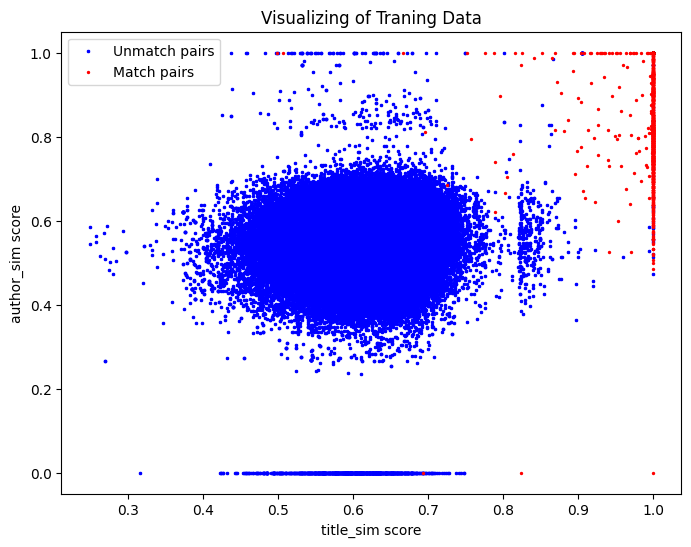

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Create separate scatter plots for each label
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue',marker="x", s=3, label="Unmatch pairs")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red',s=2, label="Match pairs")

# Add labels and title
plt.xlabel('title_sim score')
plt.ylabel('author_sim score')
plt.title('Visualizing of Traning Data')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
train_sim_df

,,title_sim,author_sim,label
journals/sigmod/MedskerCS95,219746,0.576555,0.578679,0
journals/sigmod/Grohe02,507361,0.527778,0.472222,0
conf/sigmod/ChaudhuriGS03,872789,0.669444,0.626481,0
journals/sigmod/FrankNS02,601861,0.637289,0.484575,0
conf/vldb/PatonG01,672190,0.618599,0.581492,0
...,...,...,...,...
conf/sigmod/LeeKOTM00,336579,0.665450,0.690852,0
conf/vldb/NaumannLF99,671357,0.679052,0.620354,0
journals/sigmod/DogacAOD95,212024,0.665377,0.498377,0
journals/sigmod/Snodgrass02a,637429,0.509524,0.625758,0


In [ ]:
test_sim_df = compute_similary(comparer=comparer,X=test_set,ds1=ds2,ds2=ds1)
X_test, y_test = df2ds(test_sim_df)

MultiIndex([(        'conf/sigmod/JonssonFS98', 276333),
            (        'conf/sigmod/WangTYGWP02', 564746),
            (         'conf/sigmod/VriesMNK02', 564794),
            (               'conf/vldb/Moni96', 673461),
            (        'conf/sigmod/ThaperGIK02', 564788),
            ('conf/sigmod/AgrawalCFGHIIMMSS94', 191951),
            (            'conf/vldb/Gawlick96', 673496),
            (              'conf/vldb/ArunJ98', 671029),
            (          'conf/vldb/CiacciaPZ97', 673646),
            (           'conf/sigmod/ChoALS03', 872821),
            ...
            (        'conf/vldb/BraumandlCK98', 671325),
            (         'conf/sigmod/GriffinL95', 223787),
            ('conf/sigmod/RundensteinerCCSO00', 335391),
            (      'journals/sigmod/DunhamH95', 202671),
            (         'conf/vldb/BaulierBKS98', 671346),
            (       'conf/sigmod/BaruFGHJPW95', 223886),
            (        'journals/sigmod/Ozsu01a', 604284),
            (  

In [ ]:
svm = SVC().fit(X_train,y_train)

In [ ]:
eval_svm = evaluate(svm,X_test,y_test)
eval_svm

{'f1_score': 0.9832026875699889,
 'recall_score': 0.9887387387387387,
 'precision_score': 0.977728285077951,
 'accuracy_score': 0.9995215311004785}

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)

In [ ]:
logistic = evaluate(lr, X_test, y_test)
logistic


{'f1_score': 0.9808773903262092,
 'recall_score': 0.9819819819819819,
 'precision_score': 0.9797752808988764,
 'accuracy_score': 0.9994577352472089}

In [ ]:
data = {
    'model_name': ['Support Vector Machine','Logistic Regression'],
    'f1_score': [eval_svm["f1_score"], logistic["f1_score"]],
    'recall_score': [eval_svm["recall_score"], logistic["recall_score"]],
    'precision_score': [eval_svm["precision_score"], logistic["precision_score"]],
    'accuracy_score': [eval_svm["accuracy_score"], logistic["accuracy_score"]]
}
df = pd.DataFrame(data)
df


,model_name,f1_score,recall_score,precision_score,accuracy_score
0,Support Vector Machine,0.983203,0.988739,0.977728,0.999522
1,Logistic Regression,0.980877,0.981982,0.979775,0.999458
